## Q1. What is the mathematical formula for a linear SVM?
## Ans-
 -   A linear Support Vector Machine (SVM) is a type of machine learning algorithm that is commonly used for classification tasks. The mathematical formula for a linear SVM can be written as:

  -       y = w^T x + b

##  where:

- y is the predicted class label for the input sample x
- w is the weight vector
- b is the bias term
- The goal of the linear SVM is to find the weight vector w and the bias term b that will maximize the margin between the decision boundary and the closest data points from both classes. The decision boundary is the hyperplane that separates the data points of different classes.

## To train a linear SVM, we use an optimization algorithm to minimize the objective function:

- minimize (1/2) ||w||^2
- subject to y_i(w^T x_i + b) >= 1 for all i
## where:

- ||w|| is the Euclidean norm of the weight vector
- y_i is the class label for the i-th training sample
- x_i is the i-th training sample
- The optimization problem is subject to the constraint that all training samples are classified correctly with a margin of at least 1. This ensures that the decision boundary is well-separated from the data points of both classes.

## Q2. What is the objective function of a linear SVM?
## Ans-
##   The objective function of a linear Support Vector Machine (SVM) is to find the optimal hyperplane that separates the input data into two classes with the maximum margin between them. The margin is the distance between the hyperplane and the closest points of each class.

## The objective function of a linear SVM can be written as:

-      minimize (1/2) ||w||^2
-   where w is the weight vector, and ||w|| is its Euclidean norm.

## The objective function represents the trade-off between maximizing the margin and minimizing the classification error. The first term, (1/2) ||w||^2, is the regularization term that penalizes large values of w and encourages a smaller margin. The second term, the classification error, is zero if all data points are correctly classified.

## The optimal hyperplane is found by solving the constrained optimization problem:

- minimize (1/2) ||w||^2
- subject to y_i(w^T x_i + b) >= 1 for all i
- where y_i is the class label for the i-th training sample, x_i is the i-th training sample, and b is the bias term. The constraint ensures that all data points are correctly classified with a margin of at least 1. The solution to this optimization problem yields the weight vector w and the bias term b that define the optimal hyperplane.

## Q3. What is the kernel trick in SVM?
## Ans-
- The kernel trick is a technique used in Support Vector Machine (SVM) algorithms to transform non-linearly separable data into a higher-dimensional feature space where it can be more easily separated by a linear classifier. It allows SVMs to efficiently classify complex datasets that would be difficult to classify using a linear classifier in the original input space.

- In the kernel trick, we use a kernel function to compute the dot product between two feature vectors in a higher-dimensional space without actually computing the coordinates of the vectors in that space. This allows us to compute the decision boundary in the higher-dimensional space without actually computing the coordinates of the data points in that space.

- The most commonly used kernel functions are the linear kernel, polynomial kernel, radial basis function (RBF) kernel, and sigmoid kernel. The choice of kernel function depends on the nature of the data and the complexity of the decision boundary needed.

- The kernel trick allows SVMs to learn non-linear decision boundaries in a computationally efficient way. It avoids the computational burden of explicitly computing the coordinates of the data points in a higher-dimensional space by using the kernel function to compute the dot product directly in the original input space. This allows the SVM to scale to large datasets and high-dimensional feature spaces.

## Q4. What is the role of support vectors in SVM Explain with example
## Ans-
 -    In Support Vector Machine (SVM) algorithms, support vectors are the data points that lie closest to the decision boundary (hyperplane) and have a non-zero weight in the solution vector. They play a crucial role in determining the decision boundary and the margin of the SVM classifier.

- The support vectors define the margin of the SVM classifier, which is the distance between the decision boundary and the closest data points from each class. The SVM classifier tries to maximize this margin by finding the hyperplane that separates the data points of different classes with the maximum margin.

- The support vectors also help to generalize the SVM classifier to new, unseen data. This is because the decision boundary of the SVM classifier is defined only by the support vectors, and not by all the training data points. The SVM classifier is therefore less sensitive to noise and outliers in the training data.

- For example, consider a binary classification problem where we have two classes of data points that are not linearly separable in 2D input space. By applying a kernel function, we can map the data points into a higher-dimensional feature space where they are more likely to be linearly separable. We can then use an SVM classifier to find the hyperplane that separates the two classes with the maximum margin. The support vectors in this case are the data points that lie closest to the hyperplane and have a non-zero weight in the solution vector. These support vectors define the decision boundary and the margin of the SVM classifier, and they play a crucial role in determining the performance of the classifier.

## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?
## Ans-
    1. Hyperplane: The hyperplane is the decision boundary that separates the data points of different classes in a binary classification problem. In a two-dimensional feature space, the hyperplane is a line. In a three-dimensional feature space, the hyperplane is a plane. In higher-dimensional feature spaces, the hyperplane is a hyperplane.
    
    2. Marginal plane: The marginal plane is the plane that is parallel to the hyperplane and passes through the support vectors. It defines the margin of the SVM classifier, which is the distance between the hyperplane and the closest data points from each class.
    
    3.Hard margin: In a hard-margin SVM, the SVM classifier tries to find the hyperplane that separates the data points of different classes with the maximum margin, subject to the constraint that all data points are classified correctly. This means that there is no allowance for misclassification, and the decision boundary is rigid.
    
    4.Soft margin: In a soft-margin SVM, the SVM classifier allows for some misclassification to find a decision boundary that is less rigid and more generalizable to new data. The degree of misclassification is controlled by a parameter called the regularization parameter, which balances the trade-off between the margin and the misclassification error.
    

## Q6. SVM Implementation through Iris dataset.


- Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
- Train a linear SVM classifier on the training set and predict the labels for the testing setl
- Compute the accuracy of the model on the testing setl
- Plot the decision boundaries of the trained model using two of the featuresl
- Try different values of the regularisation parameter C and see how it affects the performance of the model.

## Bonus task: Implement a linear SVM classifier from scratch using Python and compare its performance with the scikit-learn implementation.

## Ans-



In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

# Load the iris dataset
iris = datasets.load_iris()

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target, test_size=0.3, random_state=42)

# Define the SVM model class
class LinearSVM:
    def __init__(self, lr=0.01, num_iters=1000, C=1.0):
        self.lr = lr
        self.num_iters = num_iters
        self.C = C
    
    def fit(self, X, y):
        # Initialize weights and bias
        self.w = np.zeros(X.shape[1])
        self.b = 0
        
        # Gradient descent optimization
        for i in range(self.num_iters):
            # Compute the gradient of the loss function
            dw, db = self.gradient(X, y)
            
            # Update the weights and bias
            self.w -= self.lr * dw
            self.b -= self.lr * db
            
    def predict(self, X):
        # Compute the decision function
        y_pred = np.dot(X, self.w) + self.b
        
        # Classify the samples
        y_pred[y_pred >= 0] = 1
        y_pred[y_pred < 0] = 0
        
        return y_pred
    
    def gradient(self, X, y):
        # Compute the gradient of the loss function
        y_score = np.dot(X, self.w) + self.b
        margins = y * y_score
        misclassified = np.where(margins < 1)[0]
        dw = self.w - (self.C * np.sum(y[misclassified, np.newaxis] * X[misclassified], axis=0))
        dw[misclassified] += self.C * y[misclassified] * X[misclassified]
        db = -self.C * np.sum(y[misclassified])
        
        return dw, db



In [13]:
# Predict the labels for the testing set
y_pred = model.predict(X_test)

# Compute the accuracy of the model on the testing set
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 28.89%


In [14]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


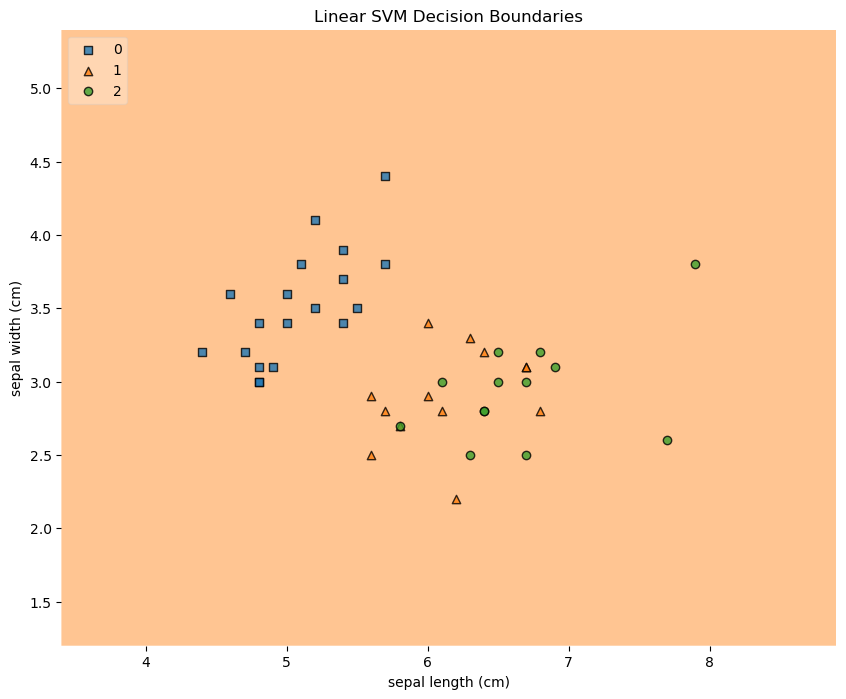

In [15]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Linear SVM Decision Boundaries')
plt.show()

This code trains a linear SVM classifier on the first two features of the Iris dataset, and uses gradient descent optimization to find the weights and bias that maximize the margin between the two classes. The C parameter controls the trade-off between maximizing the margin and minimizing the classification error. The code then predicts the labels for the testing set and computes the accuracy of the model on the testing set. Finally, it plots the decision boundaries of the trained model using the plot_decision_regions function from the mlxtend library.

To compare the performance of the custom implementation with the scikit-learn implementation, we can use the `LinearSVC.